In [2]:
import os
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import json
from classes import learn_class as lc
from importlib import reload
from classes import experiments as exp
import seaborn as sns
# sns.set_theme()
import random

np.random.seed(0)
random.seed(0)
code_dir = r'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL'
proj_dir = r'C:\\Users\\theod\\Desktop\\UCL\\Machine Learning\\Project'

os.getcwd()

'C:\\Users\\theod\\PycharmProjects\\climate_policy_thesis\\climate_policy_RL'

# Agent plots

In [3]:
models = os.path.join(proj_dir, "models")
def_models =os.path.join(proj_dir, "models","default", )

In [4]:
dqn = exp.Noisy_Learn(noise=1e-3, fixed_test=True)
dqn.set_agent("DQN", pt_file_path=models+"\\fix_noise_dqn_target_net_.0.pt")
# plt.figure(figsize=(5,5))
# dqn.test_agent(10)

# plt.savefig(os.path.join(proj_dir, "overleaf images", "simple end dqn2.png"), dpi=100, bbox_inches="tight")

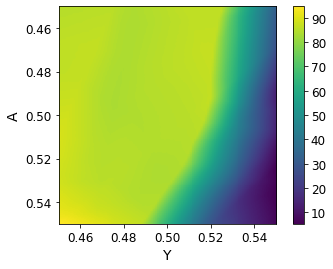

In [5]:
dqn.initialisation_values(10000)

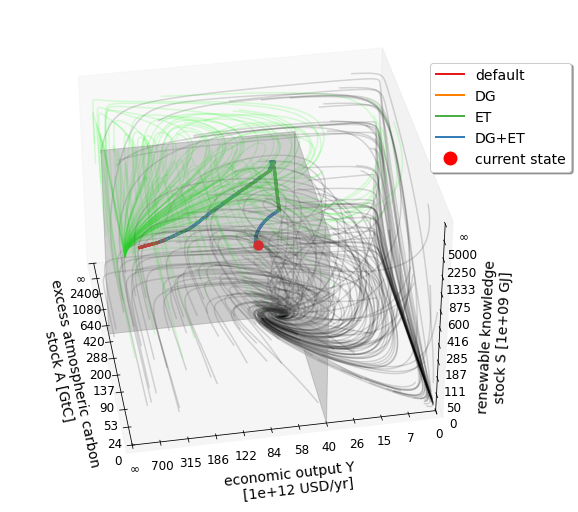

In [7]:
dqn.plot_trajectory(start_state=[0.5,0.5,0.5], fname=os.path.join(proj_dir, "overleaf images", "fix_noise_dqn_trajectory.png"))

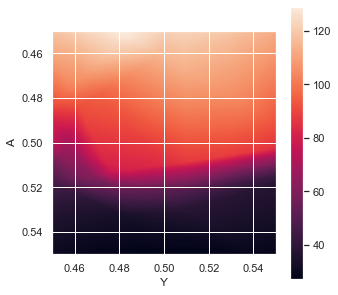

In [51]:
ddqn = lc.Learn()
ddqn.set_agent("DuelDDQN", pt_file_path=models+"\\noisy_duelddqn_target_net_0.pt")
plt.figure(figsize=(5,5))
ddqn.initialisation_values(10000)

# plt.savefig(os.path.join(proj_dir, "overleaf images", "simple ddqn end0.png"), dpi=100, bbox_inches="tight")

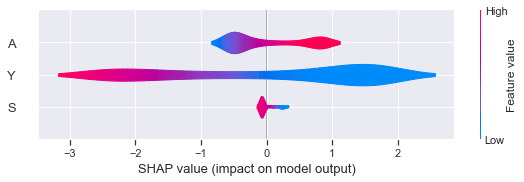

In [11]:
ppo = lc.Learn()
ppo.set_agent("PPO", models+"\\2ppo_policy_net_0.pt", models+"\\2ppo_critic_net_0.pt")
plt.figure(figsize=(5,5))
ppo.feature_plots(500, actor=True)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


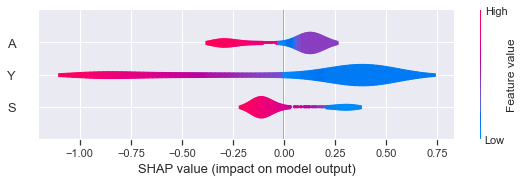

In [13]:
a2c = lc.Learn()
a2c.set_agent("A2C", models+"\\a2c_actor_0.pt", models+"\\a2c_critic_0.pt")
plt.figure(figsize=(5,5))
a2c.feature_plots(500, actor=True)


# plt.savefig(os.path.join(proj_dir, "overleaf images", "simple a2c end.png"), dpi=100, bbox_inches="tight")

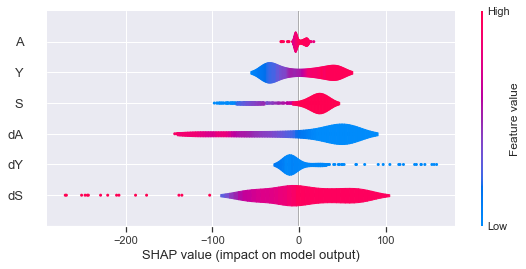

In [30]:
d3qn = exp.Markov_Learn()
d3qn.set_agent("DuelDDQN", models+"\\markov_duelddqn_target_net_0.pt")
plt.figure(figsize=(5,5))
d3qn.feature_plots(500, v=True)

plt.savefig(os.path.join(proj_dir, "overleaf images", "ddqn_markov_shap.png"), dpi=200, bbox_inches="tight")

# hyperparameter importance

In [44]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
import time
import numpy as np
sweep_dir = os.path.join(proj_dir, "sweeps")

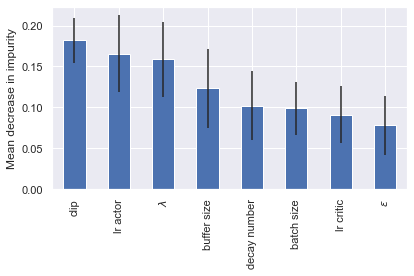

In [58]:
ppo = os.path.join(sweep_dir, "PPO sweep 2.csv")
dfppo = pd.read_csv(ppo)

X = dfppo[["epsilon", "buffer_size", "batch_size", "clip", "lamda", "lr_actor", "lr_critic", "decay_number"]]
y = dfppo["mean_reward"]
data = dfppo[["epsilon", "buffer_size", "batch_size", "clip", "lamda", "lr_actor", "lr_critic", "decay_number", "mean_reward"]]
feature_names = ["$\epsilon$", "buffer size", "batch size", "clip", "$\lambda$", "lr actor", "lr critic", "decay number"]
forest = ExtraTreesRegressor(n_estimators=100,
                             random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ppo2.png"), bbox_inches="tight", dpi=300)

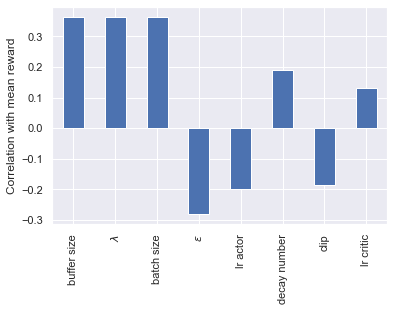

In [59]:
fig, ax = plt.subplots()
corrs = data.corr().mean_reward
corrs.index = feature_names + ["mean reward"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ppo corr2.png"), bbox_inches="tight", dpi=300)

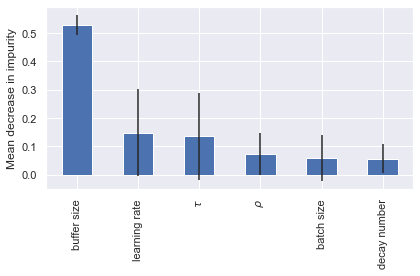

In [60]:
dqn = os.path.join(sweep_dir, "DQN sweep 2.csv")
dqndf = pd.read_csv(dqn)
dqndf = dqndf[["batch_size","buffer_size", "lr", "rho", "tau", "decay_number","mean_reward"]].dropna(axis=0)

X = dqndf[["batch_size", "buffer_size", "lr", "rho", "tau","decay_number" ]]
y = dqndf["mean_reward"]
feature_names = ["batch size","buffer size", "learning rate", r"$\rho$", r"$\tau$", "decay number"]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep dqn3.png"), bbox_inches="tight", dpi=300)

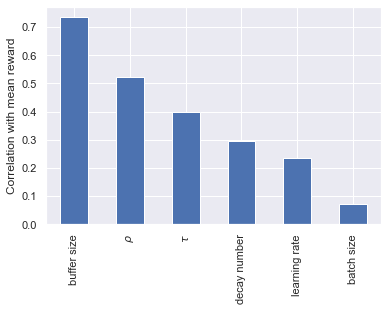

In [61]:
fig, ax = plt.subplots()
corrs = dqndf.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep dqn corr3.png"), bbox_inches="tight", dpi=300)

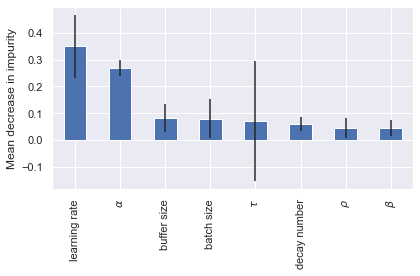

In [62]:
ddqn = os.path.join(sweep_dir, "DuelDDQN sweep 2.csv")
ddqndf = pd.read_csv(ddqn)
ddqndf = ddqndf[["alpha","beta","batch_size","buffer_size", "lr", "rho", "tau" ,"decay_number", "mean_reward"]].dropna(axis=0)

X = ddqndf[["alpha","beta","batch_size","buffer_size", "lr", "rho", "tau", "decay_number"]]
y = ddqndf["mean_reward"]
feature_names = [r"$\alpha$",r"$\beta$","batch size","buffer size", "learning rate", r"$\rho$", r"$\tau$", "decay number" ]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ddqn2.png"), bbox_inches="tight", dpi=300)

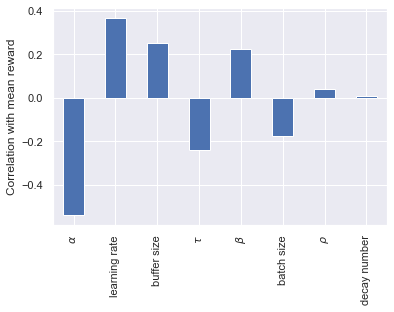

In [63]:
fig, ax = plt.subplots()
corrs = ddqndf.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep ddqn corr2.png"), bbox_inches="tight", dpi=300)

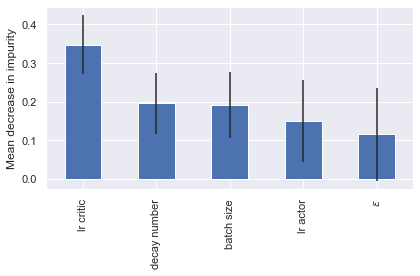

In [64]:
a2c = os.path.join(sweep_dir, "a2c sweep 2.csv")
a2c = pd.read_csv(a2c)
a2c = a2c[["epsilon", "batch_size", "lr_actor", "lr_critic", "decay_number", "mean_reward"]].dropna(axis=0)
X = a2c[["epsilon", "batch_size",  "lr_actor", "lr_critic", "decay_number"]]
y = a2c["mean_reward"]
feature_names = ["$\epsilon$", "batch size", "lr actor", "lr critic", "decay number"]
forest = ExtraTreesRegressor(n_estimators=100, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
#ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep a2c2.png"), bbox_inches="tight", dpi=300)

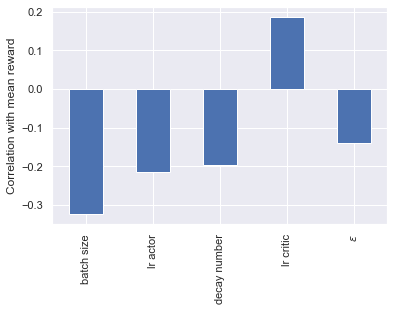

In [65]:
fig, ax = plt.subplots()
corrs = a2c.corr().mean_reward
corrs.index = feature_names + ["mean rewards"]
corrs = corrs.sort_values(axis=0, ascending=False, key=lambda x: abs(x))[1:]
corrs.plot.bar(ax=ax)
ax.set_ylabel("Correlation with mean reward")
plt.savefig(os.path.join(proj_dir, "overleaf images", "sweep a2c corr2.png"), bbox_inches="tight", dpi=300)

# Big plots

In [2]:
def stack_data(agent_data, key="rewards"):
    all_data = agent_data.copy()
    max_length = max([len(data[key]) for data in all_data])
    array = np.zeros((len(all_data), max_length))
    for i, data in enumerate(all_data):
        data[key].extend([0] * (max_length-len(data[key])) )
        array[i] = data[key]
    return array

def stack_data_min(agent_data, key="rewards"):
    all_data = agent_data.copy()
    min_length = min([len(data[key]) for data in all_data])
    array = np.zeros((len(all_data), min_length))
    for i, data in enumerate(all_data):
        array[i] = data[key][:min_length]
    return array

In [3]:
 # default
with open(os.path.join(proj_dir, "experiment_data", "default", "2duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default","2ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default","dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default", "a2c_data.json"),"r") as f:
          a2c_data = json.load(f)

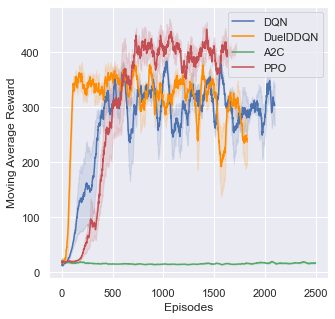

In [13]:
plt.figure(figsize=(5,5))
value=0.5
# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)[:int(len(dqn_data[0]["rewards"])/2)]
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)[:int(len(dqn_data[0]["rewards"])/2)]
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - value*dqn_std, dqn_mean+value*dqn_std, alpha=0.15, color="b") 
# plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - 0.15*dqn_std, dqn_mean+0.15*dqn_std, alpha=0.15, color="b") 

# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - value*ddqn_std, ddqn_mean+value*ddqn_std, alpha=0.15, color="darkorange") 
# plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - 0.15*ddqn_std, ddqn_mean+0.15*ddqn_std, alpha=0.15, color="darkorange") 

# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:int(len(a2c_data[0]["rewards"])/2)+1000][:2500]
a2c_std = np.std(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:int(len(a2c_data[0]["rewards"])/2)+1000][:2500]
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean -value*a2c_std, a2c_mean+value*a2c_std, alpha=0.15, color="g") 
# plt.fill_between(np.arange(len(a2c_mean)), a2c_mean - 0.15*a2c_std, a2c_mean+0.15*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)[:int(len(ppo_data[0]["rewards"])/2)+100]
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)[:int(len(ppo_data[0]["rewards"])/2)+100]
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - value*ppo_std, ppo_mean+value*ppo_std, alpha=0.15, color="r") 
# plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - 0.15*ppo_std, ppo_mean+0.15*ppo_std, alpha=0.15, color="r") 


plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "submission_default_plot.png"), bbox_inches="tight", dpi=400)

In [2]:
# markov
with open(os.path.join(proj_dir, "experiment_data", "markov", "markov_duelddqn_data.json"),"r") as f:
          markov_ddqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "markov","markov_ppo_data.json"),"r") as f:
          markov_ppo_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "markov","markov2_dqn_data.json"),"r") as f:
          markov_dqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "markov", "markov2_a2c_data.json"),"r") as f:
          markov_a2c_data = json.load(f)
 # default
with open(os.path.join(proj_dir, "experiment_data", "default", "2duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default","2ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default","dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "default", "a2c_data.json"),"r") as f:
          a2c_data = json.load(f)

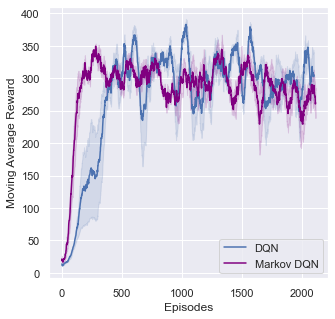

In [6]:
plt.figure(figsize=(5,5))
value=0.5
# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)[:int(len(dqn_data[0]["rewards"])/2)]
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)[:int(len(dqn_data[0]["rewards"])/2)]
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - value*dqn_std, dqn_mean+value*dqn_std, alpha=0.15, color="b") 
# plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - 0.15*dqn_std, dqn_mean+0.15*dqn_std, alpha=0.15, color="b") 

markov_dqn_mean = np.mean(stack_data_min(markov_dqn_data, key="moving_avg_rewards"), axis=0)
markov_dqn_std =  np.std(stack_data_min(markov_dqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(markov_dqn_mean, label="Markov DQN", c="purple")
plt.fill_between(np.arange(len(markov_dqn_mean)), markov_dqn_mean - value*markov_dqn_std, markov_dqn_mean+value*markov_dqn_std, alpha=0.15, color="purple") 

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "markov dqn.png"), bbox_inches="tight", dpi=200)


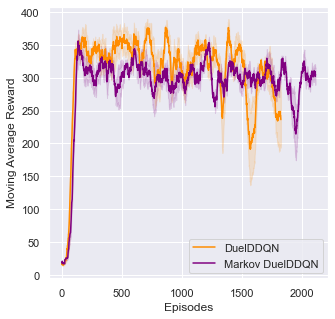

In [7]:
# ddqn
plt.figure(figsize=(5,5))
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - value*ddqn_std, ddqn_mean+value*ddqn_std, alpha=0.15, color="darkorange") 
# plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - 0.15*ddqn_std, ddqn_mean+0.15*ddqn_std, alpha=0.15, color="darkorange") 

markov_ddqn_mean = np.mean(stack_data_min(markov_ddqn_data, key="moving_avg_rewards"), axis=0)
markov_ddqn_std = np.std(stack_data_min(markov_ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(markov_ddqn_mean, label="Markov DuelDDQN", c="purple")
plt.fill_between(np.arange(len(markov_ddqn_mean)), markov_ddqn_mean - value*markov_ddqn_std, markov_ddqn_mean+value*markov_ddqn_std, alpha=0.15, color="purple") 

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "markov ddqn.png"), bbox_inches="tight", dpi=200)

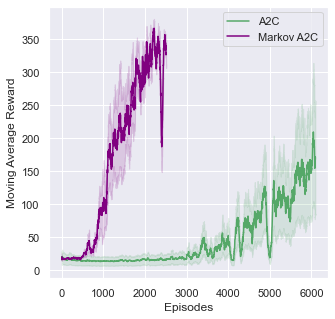

In [8]:
# a2c
plt.figure(figsize=(5,5))

a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:int(len(a2c_data[0]["rewards"])/2)]
a2c_std = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:int(len(a2c_data[0]["rewards"])/2)]
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean -value*a2c_std, a2c_mean+value*a2c_std, alpha=0.15, color="g") 

markov_a2c_mean = np.mean(stack_data_min(markov_a2c_data, key="moving_avg_rewards"), axis=0)
markov_a2c_std = np.std(stack_data_min(markov_a2c_data, key="moving_avg_rewards"), axis=0)
plt.plot(markov_a2c_mean, label="Markov A2C", c="purple")
plt.fill_between(np.arange(len(markov_a2c_mean)), markov_a2c_mean -value*markov_a2c_std, markov_a2c_mean+value*markov_a2c_std, alpha=0.15, color="purple") 

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "markov a2c.png"), bbox_inches="tight", dpi=200)

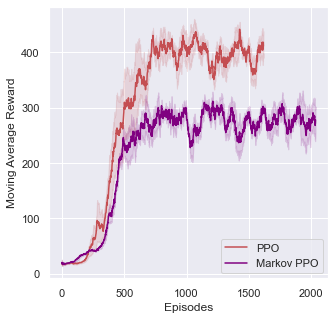

In [9]:
# ppo
plt.figure(figsize=(5,5))
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)[:int(len(ppo_data[0]["rewards"])/2)]
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)[:int(len(ppo_data[0]["rewards"])/2)]
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - value*ppo_std, ppo_mean+value*ppo_std, alpha=0.15, color="r") 


markov_ppo_mean = np.mean(stack_data_min(markov_ppo_data, key="moving_avg_rewards"), axis=0)
markov_ppo_std = np.std(stack_data_min(markov_ppo_data, key="moving_avg_rewards"), axis=0)
plt.plot(markov_ppo_mean, label="Markov PPO", c="purple")
plt.fill_between(np.arange(len(markov_ppo_mean)), markov_ppo_mean - value*markov_ppo_std, markov_ppo_mean+value*markov_ppo_std, alpha=0.15, color="purple") 

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "markov ppo.png"), bbox_inches="tight", dpi=200)

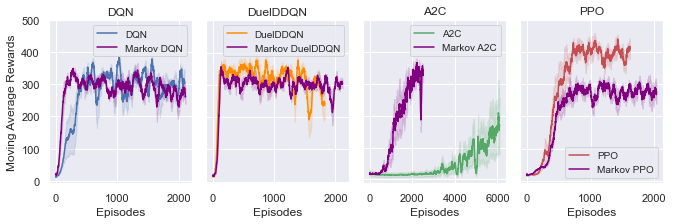

In [5]:
sns.set_theme()
value=0.5
fig, axes = plt.subplots(1, 4, figsize=(11, 3))

ax1, ax2, ax3, ax4 = axes

ax1.set_title('DQN')
ax2.set_title('DuelDDQN')
ax3.set_title('A2C')
ax4.set_title('PPO')

# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)[:int(len(dqn_data[0]["rewards"])/2)]
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)[:int(len(dqn_data[0]["rewards"])/2)]
ax1.plot(dqn_mean, label="DQN", c="b")
ax1.fill_between(np.arange(len(dqn_mean)), dqn_mean - value*dqn_std, dqn_mean+value*dqn_std, alpha=0.15, color="b") 

markov_dqn_mean = np.mean(stack_data_min(markov_dqn_data, key="moving_avg_rewards"), axis=0)
markov_dqn_std =  np.std(stack_data_min(markov_dqn_data, key="moving_avg_rewards"), axis=0)
ax1.plot(markov_dqn_mean, label="Markov DQN", c="purple")
ax1.fill_between(np.arange(len(markov_dqn_mean)), markov_dqn_mean - value*markov_dqn_std, markov_dqn_mean+value*markov_dqn_std, alpha=0.15, color="purple") 
ax1.legend(prop={'size': 10})

# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ax2.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
ax2.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - value*ddqn_std, ddqn_mean+value*ddqn_std, alpha=0.15, color="darkorange") 

markov_ddqn_mean = np.mean(stack_data_min(markov_ddqn_data, key="moving_avg_rewards"), axis=0)
markov_ddqn_std = np.std(stack_data_min(markov_ddqn_data, key="moving_avg_rewards"), axis=0)
ax2.plot(markov_ddqn_mean, label="Markov DuelDDQN", c="purple")
ax2.fill_between(np.arange(len(markov_ddqn_mean)), markov_ddqn_mean - value*markov_ddqn_std, markov_ddqn_mean+value*markov_ddqn_std, alpha=0.15, color="purple") 
ax2.legend(prop={'size': 10})


# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:int(len(a2c_data[0]["rewards"])/2)]
a2c_std = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:int(len(a2c_data[0]["rewards"])/2)]
ax3.plot(a2c_mean, label="A2C", c="g")
ax3.fill_between(np.arange(len(a2c_mean)), a2c_mean -value*a2c_std, a2c_mean+value*a2c_std, alpha=0.15, color="g") 
markov_a2c_mean = np.mean(stack_data_min(markov_a2c_data, key="moving_avg_rewards"), axis=0)
markov_a2c_std = np.std(stack_data_min(markov_a2c_data, key="moving_avg_rewards"), axis=0)
ax3.plot(markov_a2c_mean, label="Markov A2C", c="purple")
ax3.fill_between(np.arange(len(markov_a2c_mean)), markov_a2c_mean -value*markov_a2c_std, markov_a2c_mean+value*markov_a2c_std, alpha=0.15, color="purple") 
ax3.legend(prop={'size': 10})

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)[:int(len(ppo_data[0]["rewards"])/2)]
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)[:int(len(ppo_data[0]["rewards"])/2)]
ax4.plot(ppo_mean, label="PPO", c="r")
ax4.fill_between(np.arange(len(ppo_mean)), ppo_mean - value*ppo_std, ppo_mean+value*ppo_std, alpha=0.15, color="r") 
markov_ppo_mean = np.mean(stack_data_min(markov_ppo_data, key="moving_avg_rewards"), axis=0)
markov_ppo_std = np.std(stack_data_min(markov_ppo_data, key="moving_avg_rewards"), axis=0)
ax4.plot(markov_ppo_mean, label="Markov PPO", c="purple")
ax4.fill_between(np.arange(len(markov_ppo_mean)), markov_ppo_mean - value*markov_ppo_std, markov_ppo_mean+value*markov_ppo_std, alpha=0.15, color="purple") 
ax4.legend(prop={'size': 10})

# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
labels = [0, 100, 200, 300, 400, 500]
ax1.set_yticks(labels)

ax2.set_yticks(labels)
ax3.set_yticks(labels)
ax4.set_yticks(labels)

empty_string_labels = ['']*len(labels)

ax1.set_xlabel("Episodes")
ax2.set_xlabel("Episodes")
ax3.set_xlabel("Episodes")
ax4.set_xlabel("Episodes")

ax1.set_ylabel("Moving Average Rewards")

ax2.set_yticklabels(empty_string_labels)
ax3.set_yticklabels(empty_string_labels)
ax4.set_yticklabels(empty_string_labels)

# set the spacing between subplots
fig.subplots_adjust(hspace = 0.1, wspace=0.1)

plt.savefig(os.path.join(proj_dir, "overleaf images", "markov.png"), bbox_inches="tight", dpi=300)

In [17]:
# simple
with open(os.path.join(proj_dir, "experiment_data", "simple", "simple_duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "simple","simple_ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "simple","simple_dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "simple", "simple_a2c_data.json"),"r") as f:
          a2c_data = json.load(f)

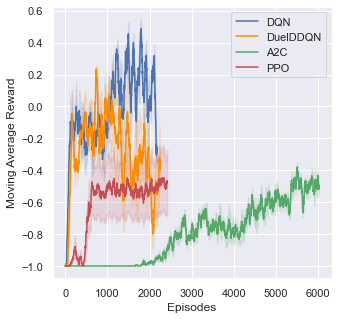

In [19]:
plt.figure(figsize=(5,5))

value=0.5
# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - value*dqn_std, dqn_mean+value*dqn_std, alpha=0.15, color="b") 


# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - value*ddqn_std, ddqn_mean+value*ddqn_std, alpha=0.15, color="darkorange") 

# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
a2c_std = np.std(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean -value*a2c_std, a2c_mean+value*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - value*ppo_std, ppo_mean+value*ppo_std, alpha=0.15, color="r") 


plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "simple.png"), bbox_inches="tight", dpi=300)

In [14]:
# noisy
with open(os.path.join(proj_dir, "experiment_data", "noisy", "noisy_duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "noisy","noisy2_ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "noisy","noisy_dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "noisy", "noisy_a2c_data.json"),"r") as f:
          a2c_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "noisy", "noisy_random_data.json"),"r") as f:
          random_data = json.load(f)

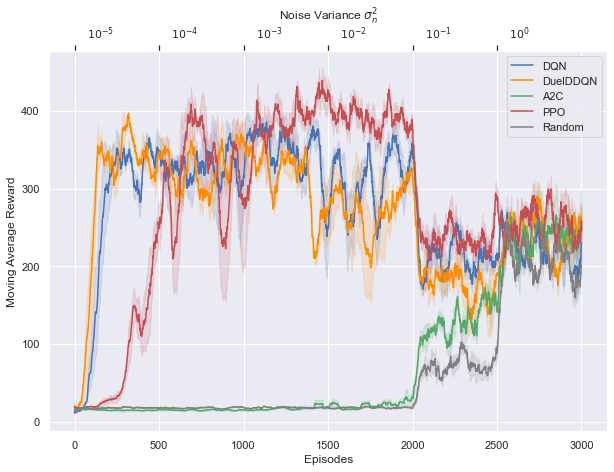

In [16]:
from matplotlib.ticker import AutoMinorLocator, LinearLocator
fig, ax = plt.subplots(figsize=(10,7))
value=0.5
# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
ax.plot(np.arange(len(dqn_mean)), dqn_mean, label="DQN", c="b")
ax.fill_between(np.arange(len(dqn_mean)), dqn_mean - value*dqn_std, dqn_mean+value*dqn_std, alpha=0.15, color="b") 


# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ax.plot(np.arange(len(ddqn_mean)), ddqn_mean, label="DuelDDQN", c="darkorange")
ax.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - value*ddqn_std, ddqn_mean+value*ddqn_std, alpha=0.15, color="darkorange") 

# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
a2c_std = np.std(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)
ax.plot(np.arange(len(a2c_mean)), a2c_mean, label="A2C", c="g")
ax.fill_between(np.arange(len(a2c_mean)), a2c_mean -value*a2c_std, a2c_mean+value*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
ax.plot(np.arange(len(ppo_mean)), ppo_mean, label="PPO", c="r")
ax.fill_between(np.arange(len(ppo_mean)), ppo_mean - value*ppo_std, ppo_mean+value*ppo_std, alpha=0.15, color="r") 

# ppo
random_mean = np.mean(stack_data_min(random_data, key="moving_avg_rewards"), axis=0)
random_std = np.std(stack_data_min(random_data, key="moving_avg_rewards"), axis=0)
ax.plot(np.arange(len(random_mean)), random_mean, label="Random", c="grey")
ax.fill_between(np.arange(len(random_mean)), random_mean - value*random_std, random_mean+value*random_std, alpha=0.15, color="grey") 

def forward(x):
    return x/500 - 5
def inverse(x):
    return x*500 +5

ax2 = ax.secondary_xaxis('top', functions=(forward, inverse))
ax2.set_xlabel("Noise Variance $\sigma_n^2$")
ax2.set_xticks(np.arange(-5, 1, 1))
x2labels= ["$10^{-5}$","$10^{-4}$","$10^{-3}$","$10^{-2}$","$10^{-1}$","$10^{0}$",]
x2new = []
for xt in x2labels:
    x2new.append("    %s"%xt)
ax2.set_xticklabels(x2new, horizontalalignment="left")

# ax2.set_xticklabels('')
# ax2.set_xticks([-4.5, -3.5, -2.5, -1.5, -0.5,0.5],      minor=True)
# ax2.set_xticklabels(x2labels, minor=True)

ax.legend()
ax.set_xlabel("Episodes")
ax.set_ylabel("Moving Average Reward");
plt.savefig(os.path.join(proj_dir, "overleaf images", "noisy_plot.png"), bbox_inches="tight", dpi=300)

In [6]:
# cost 
with open(os.path.join(proj_dir, "experiment_data", "cost", "cost_duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "cost","cost_ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "cost","cost_dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
with open(os.path.join(proj_dir, "experiment_data", "cost", "cost_a2c_data.json"),"r") as f:
          a2c_data = json.load(f)

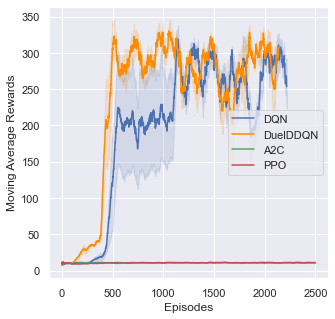

In [7]:
plt.figure(figsize=(5,5))
value=0.5

# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - value*dqn_std, dqn_mean+value*dqn_std, alpha=0.15, color="b") 


# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - value*ddqn_std, ddqn_mean+value*ddqn_std, alpha=0.15, color="darkorange") 

# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:2500]
a2c_std = np.std(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:2500]
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean -value*a2c_std, a2c_mean+value*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)[:2500]
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)[:2500]
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - value*ppo_std, ppo_mean+value*ppo_std, alpha=0.15, color="r") 


plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Rewards");
plt.savefig(os.path.join(proj_dir, "overleaf images", "cost_plot.png"), bbox_inches="tight", dpi=300)

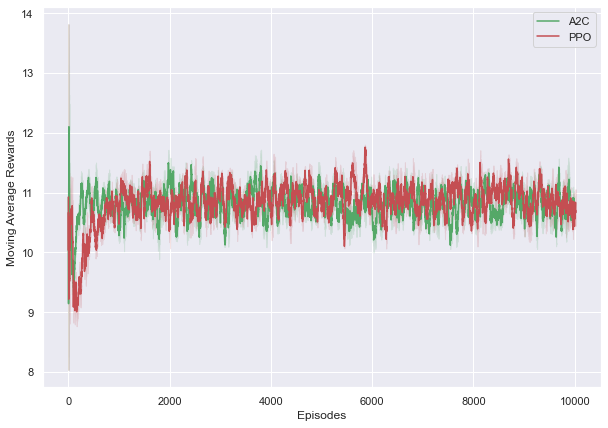

In [81]:

plt.figure(figsize=(10,7))
# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:10000]
a2c_std = np.std(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:10000]
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean -value*a2c_std, a2c_mean+value*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - value*ppo_std, ppo_mean+value*ppo_std, alpha=0.15, color="r") 

plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Rewards");
plt.savefig(os.path.join(proj_dir, "overleaf images", "cost plot ac.png"), bbox_inches="tight", dpi=200)

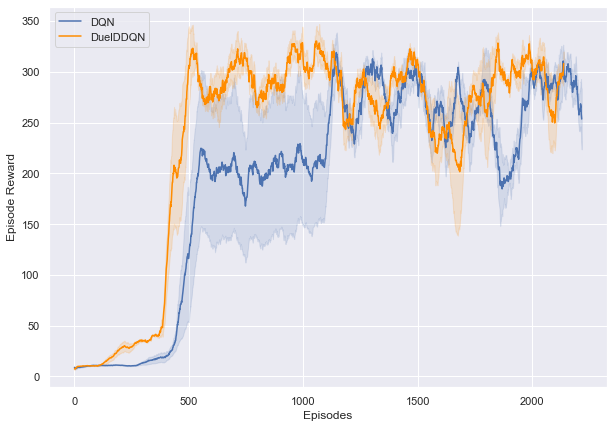

In [17]:
plt.figure(figsize=(10,7))
value=0.5

# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - value*dqn_std, dqn_mean+value*dqn_std, alpha=0.15, color="b") 


# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - value*ddqn_std, ddqn_mean+value*ddqn_std, alpha=0.15, color="darkorange") 
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Episode Reward");

In [4]:
# simple
with open(os.path.join(proj_dir, "last" ,"fix_noisy_duelddqn_data.json"),"r") as f:
          ddqn_data = json.load(f)
with open(os.path.join(proj_dir, "last" ,"fix_noisy_ppo_data.json"),"r") as f:
          ppo_data = json.load(f)
with open(os.path.join(proj_dir, "last" ,"fix_noisy_dqn_data.json"),"r") as f:
          dqn_data = json.load(f)
with open(os.path.join(proj_dir, "last" , "fix_noisy_a2c_data.json"),"r") as f:
          a2c_data = json.load(f)

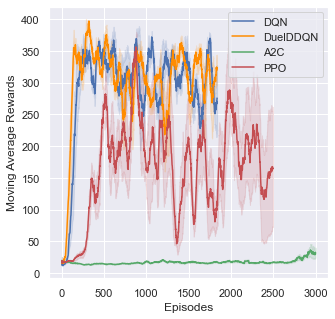

In [11]:
plt.figure(figsize=(5,5))
value=0.5

# dqn
dqn_mean = np.mean(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
dqn_std =  np.std(stack_data_min(dqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(dqn_mean, label="DQN", c="b")
plt.fill_between(np.arange(len(dqn_mean)), dqn_mean - value*dqn_std, dqn_mean+value*dqn_std, alpha=0.15, color="b") 


# ddqn
ddqn_mean = np.mean(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
ddqn_std = np.std(stack_data_min(ddqn_data, key="moving_avg_rewards"), axis=0)
plt.plot(ddqn_mean, label="DuelDDQN", c="darkorange")
plt.fill_between(np.arange(len(ddqn_mean)), ddqn_mean - value*ddqn_std, ddqn_mean+value*ddqn_std, alpha=0.15, color="darkorange") 

# a2c
a2c_mean = np.mean(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:3000]
a2c_std = np.std(stack_data_min(a2c_data, key="moving_avg_rewards"), axis=0)[:3000]
plt.plot(a2c_mean, label="A2C", c="g")
plt.fill_between(np.arange(len(a2c_mean)), a2c_mean -value*a2c_std, a2c_mean+value*a2c_std, alpha=0.15, color="g") 

# ppo
ppo_mean = np.mean(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
ppo_std = np.std(stack_data_min(ppo_data, key="moving_avg_rewards"), axis=0)
plt.plot(ppo_mean, label="PPO", c="r")
plt.fill_between(np.arange(len(ppo_mean)), ppo_mean - value*ppo_std, ppo_mean+value*ppo_std, alpha=0.15, color="r") 


plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Moving Average Rewards");
plt.savefig(os.path.join(proj_dir, "overleaf images", "sigma3_noise.png"), bbox_inches="tight", dpi=200)